# IMPORTING LIABRARY:

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# DATA LOADING AND CLEANING:

In [74]:
df = pd.read_csv('googleplaystore.csv')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [76]:
df.shape

(10841, 13)

In [77]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [78]:
df.isnull

<bound method DataFrame.isnull of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTY

In [79]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [80]:
print(df.iloc[0])

App               Photo Editor & Candy Camera & Grid & ScrapBook
Category                                          ART_AND_DESIGN
Rating                                                       4.1
Reviews                                                      159
Size                                                         19M
Installs                                                 10,000+
Type                                                        Free
Price                                                          0
Content Rating                                          Everyone
Genres                                              Art & Design
Last Updated                                     January 7, 2018
Current Ver                                                1.0.0
Android Ver                                         4.0.3 and up
Name: 0, dtype: object


In [81]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
859,YouTube Kids,ENTERTAINMENT,4.5,470089,Varies with device,"50,000,000+",Free,0,Everyone,Entertainment;Music & Video,"August 3, 2018",3.43.3,4.1 and up
2059,Strawberry Shortcake Ice Cream Island,FAMILY,4.2,32029,15M,"5,000,000+",Free,0,Everyone,Casual;Pretend Play,"November 6, 2017",1.2,4.1 and up
8761,Dr. Cares - Pet Rescue 911 🐶,FAMILY,4.2,14432,35M,"500,000+",Free,0,Everyone,Casual,"September 21, 2017",1.5,4.0.3 and up
2626,Couple - Relationship App,SOCIAL,4.0,33249,8.4M,"1,000,000+",Free,0,Everyone,Social,"March 5, 2015",1.8.0,2.3 and up
5925,BA Accesible,HEALTH_AND_FITNESS,NaN,31,4.7M,"1,000+",Free,0,Everyone,Health & Fitness,"July 19, 2016",0.0.1,4.1 and up
4340,Clock L,PERSONALIZATION,3.9,2852,5.4M,"100,000+",Free,0,Everyone,Personalization,"September 7, 2015",1.3,4.0 and up
4666,Be U Salons Hair-Beauty Deals In Delhi & Banga...,LIFESTYLE,4.0,889,16M,"100,000+",Free,0,Everyone,Lifestyle,"August 2, 2018",1.1.4.38,4.2 and up
758,Learn C++,EDUCATION,4.6,73404,5.3M,"1,000,000+",Free,0,Everyone,Education,"December 25, 2017",4.5.2,4.0 and up
8267,DC Public Library,BOOKS_AND_REFERENCE,4.2,20,3.4M,"1,000+",Free,0,Everyone,Books & Reference,"June 8, 2015",4.6.1,1.6 and up
7542,CM Security Lite - Antivirus,TOOLS,4.6,262076,1.2M,"10,000,000+",Free,0,Everyone,Tools,"January 4, 2018",1.0.2,2.3 and up


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [83]:
non_null_counts = df.notnull().sum()
print(non_null_counts)

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64


In [84]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [85]:
df.isnull().sum()[df.isnull().sum()>0]

Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

In [86]:
df.isnull().sum().sort_values(ascending=False)*100/len(df)

Rating            13.596532
Current Ver        0.073794
Android Ver        0.027673
Type               0.009224
Content Rating     0.009224
App                0.000000
Category           0.000000
Reviews            0.000000
Size               0.000000
Installs           0.000000
Price              0.000000
Genres             0.000000
Last Updated       0.000000
dtype: float64

In [87]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [88]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

# EXPLORATORY DATA ANALYSIS:
# MISSING VALUE PREPROCESSING.

<Axes: >

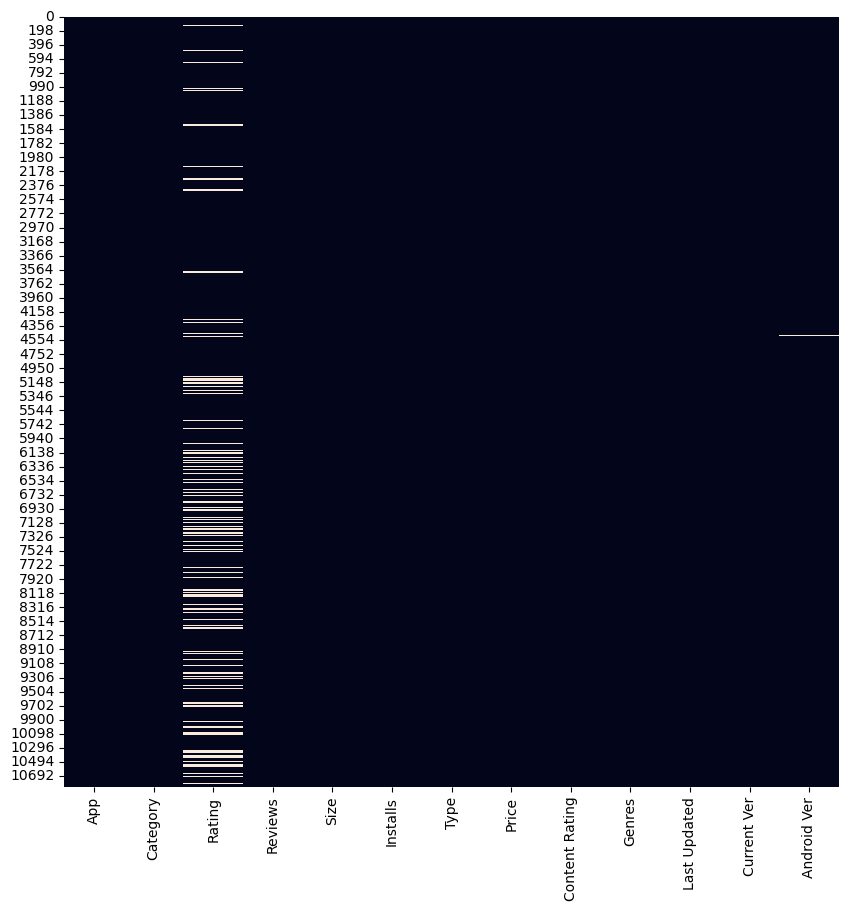

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

# NAN FILL WITH MODE:

In [90]:
Counter(df['Rating'])

Counter({4.4: 1109,
         4.3: 1076,
         4.5: 1038,
         4.2: 952,
         4.6: 823,
         4.1: 708,
         4.0: 568,
         4.7: 499,
         3.9: 386,
         3.8: 303,
         5.0: 274,
         3.7: 239,
         4.8: 234,
         3.6: 174,
         3.5: 163,
         3.4: 128,
         3.3: 102,
         4.9: 87,
         3.0: 83,
         3.1: 69,
         3.2: 64,
         2.9: 45,
         2.8: 42,
         2.6: 25,
         2.7: 25,
         2.5: 21,
         2.3: 20,
         2.4: 19,
         1.0: 16,
         2.2: 14,
         1.9: 13,
         2.0: 12,
         1.7: 8,
         1.8: 8,
         2.1: 8,
         1.6: 4,
         1.4: 3,
         1.5: 3,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan:

In [91]:
df.fillna({'Rating':'4.4'}, inplace = True)

In [92]:
# lets filled type now
Counter(df['Type'])

Counter({'Free': 10039, 'Paid': 800, nan: 1, '0': 1})

In [93]:
df.fillna({'Type':'Free'}, inplace = True)

In [94]:
# filled Content rating
Counter(df['Content Rating'])

Counter({'Everyone': 8714,
         'Teen': 1208,
         'Mature 17+': 499,
         'Everyone 10+': 414,
         'Adults only 18+': 3,
         'Unrated': 2,
         nan: 1})

In [95]:
df.fillna({'Content Rating':'Everyone'}, inplace=True)

In [96]:
Counter(df['Android Ver'])

Counter({'4.1 and up': 2451,
         '4.0.3 and up': 1501,
         '4.0 and up': 1375,
         'Varies with device': 1362,
         '4.4 and up': 980,
         '2.3 and up': 652,
         '5.0 and up': 601,
         '4.2 and up': 394,
         '2.3.3 and up': 281,
         '2.2 and up': 244,
         '4.3 and up': 243,
         '3.0 and up': 241,
         '2.1 and up': 134,
         '1.6 and up': 116,
         '6.0 and up': 60,
         '7.0 and up': 42,
         '3.2 and up': 36,
         '2.0 and up': 32,
         '5.1 and up': 24,
         '1.5 and up': 20,
         '4.4W and up': 12,
         '3.1 and up': 10,
         '2.0.1 and up': 7,
         '8.0 and up': 6,
         '7.1 and up': 3,
         nan: 3,
         '4.0.3 - 7.1.1': 2,
         '5.0 - 8.0': 2,
         '1.0 and up': 2,
         '7.0 - 7.1.1': 1,
         '4.1 - 7.1.1': 1,
         '5.0 - 6.0': 1,
         '2.2 - 7.1.1': 1,
         '5.0 - 7.1.1': 1})

In [97]:
df.fillna({'Android Ver':'4.1 and up'}, inplace = True)

In [98]:
Counter(df['Current Ver'])

Counter({'Varies with device': 1459,
         '1.0': 809,
         '1.1': 264,
         '1.2': 178,
         '2.0': 151,
         '1.3': 145,
         '1.0.0': 136,
         '1.0.1': 119,
         '1.4': 88,
         '1.5': 81,
         '1.0.2': 80,
         '1.6': 65,
         '1.0.3': 62,
         '2.1': 61,
         '3.0': 59,
         '1.0.4': 58,
         '1.7': 53,
         '2.0.0': 51,
         '1.0.5': 50,
         '1.1.0': 49,
         '1.1.1': 48,
         '1.0.6': 47,
         '1.2.1': 46,
         '1.2.0': 43,
         '1.8': 42,
         '4.0': 40,
         '1.9': 37,
         '2.3.2': 35,
         '2.4': 34,
         '1.0.7': 34,
         '1.0.9': 33,
         '2.2': 32,
         '2.0.1': 31,
         '1.1.2': 31,
         '3.1': 30,
         '5.0': 30,
         '1.4.0': 29,
         '2.5': 29,
         '1.1.3': 28,
         '1.0.8': 27,
         '3.0.0': 27,
         '2.3': 26,
         '1.3.0': 26,
         '1': 25,
         '1.2.2': 23,
         '1.2.3': 22,
         '

In [99]:
df.fillna({'Current Ver': 'Varies with device'}, inplace = True)

In [100]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# CLEAN SIZE COLUMN:

In [101]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [102]:
# we have some NaN values 
# So, Use isna() to exclude NaN
df['Size'].loc[(df['Size'].str.contains(',')) & (~df['Size'].isna())].value_counts().sum()

1

In [103]:
# find the values in size column which has 'G' in it
df['Size'].loc[(df['Size'].str.contains('G')) & (~df['Size'].isna())].value_counts().sum()

0

In [104]:
# find the values in size column which has 'M' in it
df['Size'].loc[(df['Size'].str.contains('M')) & (~df['Size'].isna())].value_counts().sum()

8829

In [105]:
# find the values in size column which has 'k' in it
df['Size'].loc[(df['Size'].str.contains('k')) & (~df['Size'].isna())].value_counts().sum()

316

In [106]:
# find the values in size column which has 'Varies with device' in it
df['Size'].loc[(df['Size'].str.contains('Varies with device')) & (~df['Size'].isna())].value_counts().sum()

1695

In [107]:
def convert_size(size_value):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'M' in it and 1024*1024 if it has 'G' in it
    If 'Varies with device' is present, it returns NaN.
    '''

    if isinstance(size_value, str):
        # Remove commas from the size values
        size_value= size_value.replace(',','')
        if 'k' in size_value:
            # Convert to float and remove 'k'
            return float(size_value.replace('k', ''))
        elif 'M' in size_value:
            # Convert to float, remove 'M', and multiply by 1024
            return float(size_value.replace('M', '')) * 1024
        elif 'G' in size_value:
            # Convert to float, remove 'G', and multiply by 1024*1024
            return float(size_value.replace('G', '')) * 1024 * 1024
        elif 'Varies with device' in size_value:
            # If 'Varies with device' is present, return NaN
            return np.nan
    return size_value

# Apply the conversion function to the 'size' column in the DataFrame
df['Size'] = df['Size'].apply(convert_size)

In [108]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_KB'}, inplace=True)

In [109]:
# making a new column called 'Size in Mb' which will have the size in MB
# df['Size_in_MB'] = df['Size_in_KB'].apply(lambda x: x/1024)

# FIX INSTALLS COLUMNS:

In [110]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [111]:
df['Installs'].value_counts().sum()

10841

In [112]:
df['Installs'].str.contains('\\+').sum()

10839

In [113]:
df['Installs'].str.contains('\\,').sum()

9036

In [114]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

# also remove the commas from the install column
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [115]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce').astype('Int64')

In [116]:
df.describe()

,Installs
count,10840.0
mean,15464338.882565
std,85029361.395463
min,0.0
25%,1000.0
50%,100000.0
75%,5000000.0
max,1000000000.0


# DEAL WITH DUPLICATE AND MISSING VALUE:

In [117]:
df.duplicated().sum()

483

In [118]:
df.drop_duplicates(inplace=True)

In [119]:
df.isnull().sum()[df.isnull().sum()>0]

Size_in_KB    1526
Installs         1
dtype: int64

In [120]:
df.dropna(subset=['Installs'], inplace=True)

In [121]:
df.isnull().sum()[df.isnull().sum()>0]

Size_in_KB    1526
dtype: int64

# TOP RATED APP:

In [122]:
top_rated_apps = df.sort_values(by='Content Rating', ascending=False).head(10)[['App', 'Rating', 'Category']]
top_rated_apps

,App,Rating,Category
7312,Best CG Photography,4.4,FAMILY
8266,DC Universe Online Map,4.1,TOOLS
5635,DIRECTV,4.1,FAMILY
8229,DB Event App,2.4,SOCIAL
3669,Iqiyi (for tablet),3.6,VIDEO_PLAYERS
3673,Free TV series,3.7,VIDEO_PLAYERS
1022,Wipe out,4.7,EVENTS
3677,Vote for,4.2,VIDEO_PLAYERS
3679,OBJECTIVE,3.8,VIDEO_PLAYERS
1019,Mummatikabalkuragi,4.9,EVENTS


# TOP 10 CATEGRY BY INSTALLS:

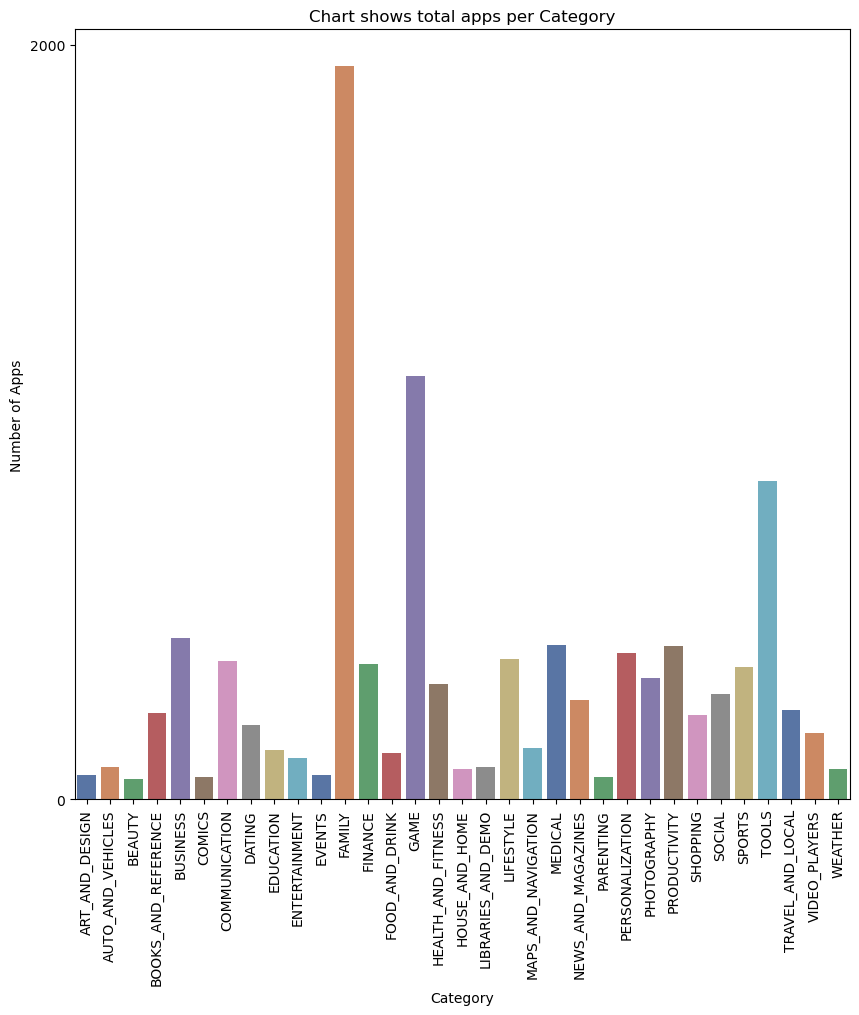

In [123]:
category_rating = df.groupby(['Category'])['App'].count().reset_index()

# Step 2: Define a color palette using seaborn's deep palette with the number of colors equal to the number of unique categories
colors = sns.color_palette("deep", n_colors=len(df['Category'])) # for colors of palette

# Step 3: Set the size of the figure
plt.figure(figsize=(10,10))

# Step 4: Create a bar plot using seaborn's barplot
sns.barplot(x='Category', y='App', data=category_rating, palette=colors)

# Step 5: Set the title of the plot
plt.title('Chart shows total apps per Category')

# Step 6: Set the x-axis & y-axis label
plt.xlabel('Category')
plt.ylabel('Number of Apps')

# Step 7: Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Step 8: Set y-axis ticks in increments of 20,000 for better readability
plt.yticks(range(0, 2800, 2000))

# Step 10: Show the plot
plt.show()

# TOP 10 CATEGORY PLAYSTORE NUMBER OF INSTALLS:

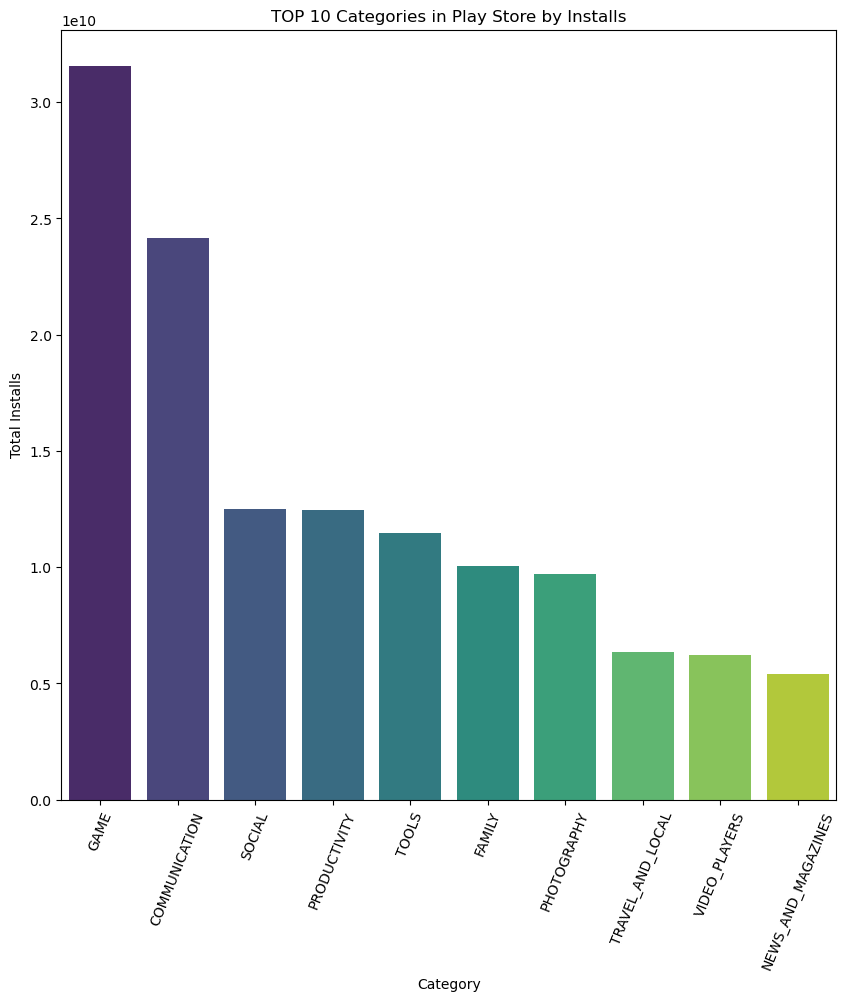

In [124]:
colors = sns.color_palette('viridis', n_colors=10)
plt.figure(figsize=(10,10))
sns.barplot(x='Category', y= 'Installs', data=df.groupby('Category')['Installs'].sum().sort_values
            (ascending=False).head(10).reset_index(),palette=colors)
plt.xticks(rotation=68)
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.title('TOP 10 Categories in Play Store by Installs')
plt.show()

# PERCENTAGE OF PAID AND FREE APPS:

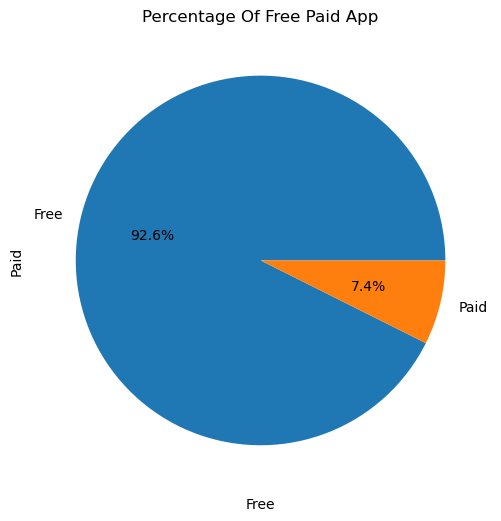

In [125]:
plt.figure(figsize=(16, 6))
df.groupby('Type')['App'].count().plot(kind='pie',autopct='%1.1f%%')
plt.xlabel('Free',)
plt.ylabel('Paid')
plt.title('Percentage Of Free Paid App')
plt.show()

# APP CATEGORIES:

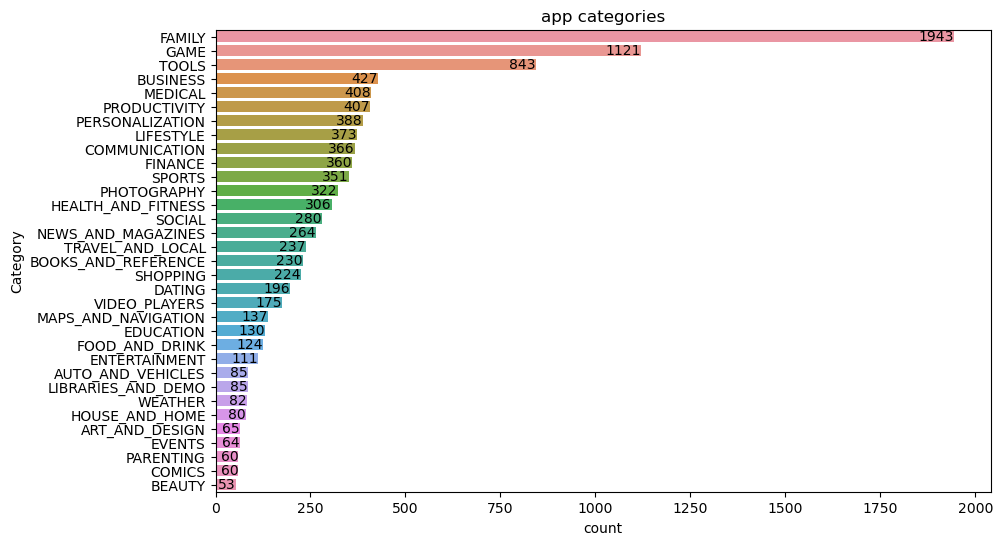

In [126]:
plt.figure(figsize=(10,6))
sns.countplot(df,y='Category',order = df['Category'].value_counts().index)
category_counts = df['Category'].value_counts()
for index, value in enumerate(category_counts):
    plt.text(value, index, str(value), ha='right', va='center')
plt.xlabel('count')
plt.ylabel('Category')
plt.title('app categories')
plt.show()

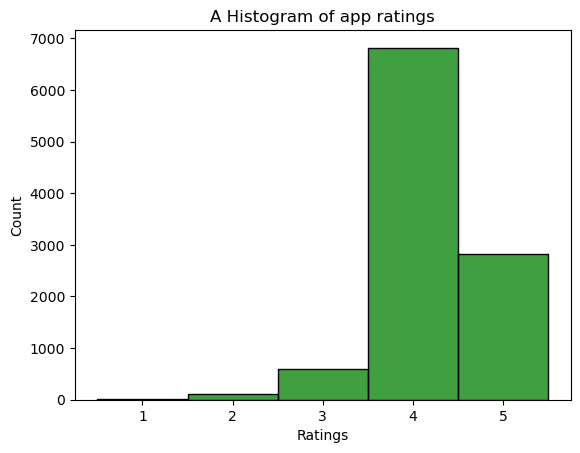

In [127]:
sns.histplot(data=df, x='Rating', bins=15, color="Green")

# Step 2: Set the title of the histogram
plt.title("A Histogram of app ratings")

# Step 3: Set the x-axis label
plt.xlabel("Ratings")

# Step 4: Set the y-axis label
plt.ylabel("Count")

# Step 5: Show the plot
plt.show()

In [129]:
df.head(). T

,0,1,2,3,4
App,Photo Editor & Candy Camera & Grid & ScrapBook,Coloring book moana,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Sketch - Draw & Paint,Pixel Draw - Number Art Coloring Book
Category,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN
Rating,4.1,3.9,4.7,4.5,4.3
Reviews,159,967,87510,215644,967
Size_in_KB,19456.0,14336.0,8908.8,25600.0,2867.2
Installs,10000,500000,5000000,50000000,100000
Type,Free,Free,Free,Free,Free
Price,0,0,0,0,0
Content Rating,Everyone,Everyone,Everyone,Teen,Everyone
Genres,Art & Design,Art & Design;Pretend Play,Art & Design,Art & Design,Art & Design;Creativity


In [130]:
df['Rating'].value_counts()

Rating
4.4    1465
4.4    1032
4.3    1016
4.5     977
4.2     888
4.6     768
4.1     657
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: count, dtype: int64

In [134]:
df_new = pd.get_dummies(df.drop(['App'],axis=1),
df_new=df_new

SyntaxError: incomplete input (4289985217.py, line 2)